# Project 5: Ensemble Machine Learning – Wine Dataset
**Name:** Moses Koroma  
**Course:** Applied Machine Learning  
**Date:** November 2025

## Introduction

In this project, we explore ensemble models, a powerful approach in machine learning that combines multiple models to improve performance. Ensemble methods often outperform individual models by reducing overfitting and improving generalization.

We will work with the Wine Quality Dataset to predict wine quality categories using various ensemble techniques including Random Forest, AdaBoost, Gradient Boosting, and Voting Classifiers.

## Dataset
**Source:** UCI Machine Learning Repository - Wine Quality Dataset  
**Original Publication:** P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. *Modeling wine preferences by data mining from physicochemical properties.* Decision Support Systems, Elsevier, 47(4):547–553, 2009.

## Objectives
- Implement and compare multiple ensemble learning techniques
- Evaluate model performance using accuracy, precision, recall, and F1-score
- Analyze overfitting and generalization across different ensemble methods
- Identify the best performing model for wine quality prediction

---

In [1]:
# ------------------------------------------------
# Imports once at the top, organized
# ------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    BaggingClassifier,
    VotingClassifier,
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

## Section 1. Load and Inspect the Data

We'll load the Wine Quality dataset and examine its structure. The dataset includes 11 physicochemical input variables and a quality score target.

In [3]:
# Load the dataset
# Note: Download winequality-red.csv from UCI repository first
df = pd.read_csv("winequality-red.csv", sep=";")

# Display structure and first few rows
print("Dataset Information:")
df.info()
print("\nFirst 5 rows:")
df.head()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB

First 5 rows:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# Dataset feature descriptions
print("Dataset Features:")
print("=================")
print("The dataset includes 11 physicochemical input variables (features):")
print("- fixed acidity: mostly tartaric acid")
print("- volatile acidity: mostly acetic acid (vinegar)")
print("- citric acid: can add freshness and flavor")
print("- residual sugar: remaining sugar after fermentation")
print("- chlorides: salt content")
print("- free sulfur dioxide: protects wine from microbes")
print("- total sulfur dioxide: sum of free and bound forms")
print("- density: related to sugar content")
print("- pH: acidity level (lower = more acidic)")
print("- sulphates: antioxidant and microbial stabilizer")
print("- alcohol: % alcohol by volume")
print("\nTarget variable:")
print("- quality: integer score from 0 to 10, rated by wine tasters")
print("\nDataset contains", len(df), "samples and", len(df.columns), "columns (11 features + target).")

# Check quality distribution
print("\nQuality score distribution:")
print(df['quality'].value_counts().sort_index())

Dataset Features:
The dataset includes 11 physicochemical input variables (features):
- fixed acidity: mostly tartaric acid
- volatile acidity: mostly acetic acid (vinegar)
- citric acid: can add freshness and flavor
- residual sugar: remaining sugar after fermentation
- chlorides: salt content
- free sulfur dioxide: protects wine from microbes
- total sulfur dioxide: sum of free and bound forms
- density: related to sugar content
- pH: acidity level (lower = more acidic)
- sulphates: antioxidant and microbial stabilizer
- alcohol: % alcohol by volume

Target variable:
- quality: integer score from 0 to 10, rated by wine tasters

Dataset contains 1599 samples and 12 columns (11 features + target).

Quality score distribution:
quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64


## Section 2. Prepare the Data

We'll clean the data, create categorical labels, and prepare it for modeling. Since the quality scores are heavily concentrated in the middle range (5-6), we'll create three balanced categories: low, medium, and high quality.

In [5]:
# Define helper function to convert quality scores to labels
def quality_to_label(q):
    """Convert quality score to categorical label"""
    if q <= 4:
        return "low"
    elif q <= 6:
        return "medium"
    else:
        return "high"

# Apply the function to create quality labels
df["quality_label"] = df["quality"].apply(quality_to_label)

# Create numeric labels for modeling: 0 = low, 1 = medium, 2 = high
def quality_to_number(q):
    """Convert quality score to numeric category"""
    if q <= 4:
        return 0
    elif q <= 6:
        return 1
    else:
        return 2

df["quality_numeric"] = df["quality"].apply(quality_to_number)

# Display the new categorical distribution
print("Quality label distribution:")
print(df['quality_label'].value_counts())
print("\nNumeric quality distribution:")
print(df['quality_numeric'].value_counts().sort_index())

# Show sample of the transformed data
print("\nSample of transformed data:")
df[['quality', 'quality_label', 'quality_numeric']].head(10)

Quality label distribution:
quality_label
medium    1319
high       217
low         63
Name: count, dtype: int64

Numeric quality distribution:
quality_numeric
0      63
1    1319
2     217
Name: count, dtype: int64

Sample of transformed data:


,quality,quality_label,quality_numeric
0,5,medium,1
1,5,medium,1
2,5,medium,1
3,6,medium,1
4,5,medium,1
5,5,medium,1
6,5,medium,1
7,7,high,2
8,7,high,2
9,5,medium,1


## Section 3. Feature Selection and Justification

We'll use all physicochemical properties as features and predict the quality category. This approach allows us to leverage all available information about the wine's composition to make predictions.

In [6]:
# Define input features (X) and target (y)
# Features: all columns except quality-related columns
X = df.drop(columns=["quality", "quality_label", "quality_numeric"])  # Features
y = df["quality_numeric"]  # Target (numeric categories)

print("Feature Selection:")
print("==================")
print(f"Features (X): {list(X.columns)}")
print(f"Number of features: {X.shape[1]}")
print(f"Target (y): quality_numeric (0=low, 1=medium, 2=high)")
print(f"Number of samples: {X.shape[0]}")

# Display feature statistics
print("\nFeature Statistics:")
X.describe()

Feature Selection:
Features (X): ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
Number of features: 11
Target (y): quality_numeric (0=low, 1=medium, 2=high)
Number of samples: 1599

Feature Statistics:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


## Section 4. Split the Data into Train and Test

We'll use stratified sampling to maintain the class distribution in both training and test sets.

In [7]:
# Train/test split (stratify to preserve class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Data Split Summary:")
print("==================")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Test set percentage: {X_test.shape[0]/len(df)*100:.1f}%")

# Check class distribution in train and test sets
print("\nClass distribution in training set:")
print(pd.Series(y_train).value_counts().sort_index())
print("\nClass distribution in test set:")
print(pd.Series(y_test).value_counts().sort_index())

Data Split Summary:
Training set: 1279 samples
Test set: 320 samples
Test set percentage: 20.0%

Class distribution in training set:
quality_numeric
0      50
1    1055
2     174
Name: count, dtype: int64

Class distribution in test set:
quality_numeric
0     13
1    264
2     43
Name: count, dtype: int64


## Section 5. Evaluate Model Performance

We'll implement and evaluate multiple ensemble models. For this analysis, I'll focus on two key ensemble approaches:
1. **Random Forest (100 trees)** - A strong baseline ensemble model
2. **Voting Classifier (DT + SVM + NN)** - Combines diverse model types

In [10]:
# Helper function to train and evaluate models
def evaluate_model(name, model, X_train, y_train, X_test, y_test, results):
    """Train and evaluate a model, storing results"""
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    train_f1 = f1_score(y_train, y_train_pred, average="weighted")
    test_f1 = f1_score(y_test, y_test_pred, average="weighted")
    
    # Calculate gaps to assess overfitting
    acc_gap = train_acc - test_acc
    f1_gap = train_f1 - test_f1

    print(f"\n{name} Results")
    print("=" * (len(name) + 8))
    print("Confusion Matrix (Test):")
    print(confusion_matrix(y_test, y_test_pred))
    print(f"Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f} (Gap: {acc_gap:.4f})")
    print(f"Train F1 Score: {train_f1:.4f}, Test F1 Score: {test_f1:.4f} (Gap: {f1_gap:.4f})")

    results.append(
        {
            "Model": name,
            "Train Accuracy": train_acc,
            "Test Accuracy": test_acc,
            "Accuracy Gap": acc_gap,
            "Train F1": train_f1,
            "Test F1": test_f1,
            "F1 Gap": f1_gap,
        }
    )
    
    return model

# Initialize results storage
results = []

In [11]:
# Model 1: Random Forest (100 trees)
print("Training Random Forest model...")
rf_model = evaluate_model(
    "Random Forest (100)",
    RandomForestClassifier(n_estimators=100, random_state=42),
    X_train,
    y_train,
    X_test,
    y_test,
    results,
)

Training Random Forest model...

Random Forest (100) Results
Confusion Matrix (Test):
[[  0  13   0]
 [  0 256   8]
 [  0  15  28]]
Train Accuracy: 1.0000, Test Accuracy: 0.8875 (Gap: 0.1125)
Train F1 Score: 1.0000, Test F1 Score: 0.8661 (Gap: 0.1339)


In [12]:
# Model 2: Voting Classifier (DT + SVM + NN)
print("Training Voting Classifier model...")
voting_model = VotingClassifier(
    estimators=[
        ("DT", DecisionTreeClassifier(random_state=42)),
        ("SVM", SVC(probability=True, random_state=42)),
        ("NN", MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)),
    ],
    voting="soft",
)

voting_trained = evaluate_model(
    "Voting (DT + SVM + NN)", 
    voting_model, 
    X_train, 
    y_train, 
    X_test, 
    y_test, 
    results
)

Training Voting Classifier model...

Voting (DT + SVM + NN) Results
Confusion Matrix (Test):
[[  0  12   1]
 [  0 253  11]
 [  0  19  24]]
Train Accuracy: 0.9203, Test Accuracy: 0.8656 (Gap: 0.0546)
Train F1 Score: 0.9033, Test F1 Score: 0.8434 (Gap: 0.0599)


## Section 6. Compare Results

Let's create a comprehensive comparison of our models, including gap analysis to identify overfitting.

In [15]:
# Create a table of results
results_df = pd.DataFrame(results)

# Sort by test accuracy (descending) to identify best performers
results_df = results_df.sort_values('Test Accuracy', ascending=False)

print("\nSummary of All Models:")
print("======================")
display(results_df)

# Identify best performing model
best_model = results_df.iloc[0]
print(f"\nBest Performing Model: {best_model['Model']}")
print(f"Test Accuracy: {best_model['Test Accuracy']:.4f}")
print(f"Test F1 Score: {best_model['Test F1']:.4f}")
print(f"Accuracy Gap: {best_model['Accuracy Gap']:.4f}")


Summary of All Models:


,Model,Train Accuracy,Test Accuracy,Accuracy Gap,Train F1,Test F1,F1 Gap
0,Random Forest (100),1.00000,0.887500,0.112500,1.000000,0.866056,0.133944
1,Voting (DT + SVM + NN),0.92025,0.865625,0.054625,0.903331,0.843416,0.059915



Best Performing Model: Random Forest (100)
Test Accuracy: 0.8875
Test F1 Score: 0.8661
Accuracy Gap: 0.1125


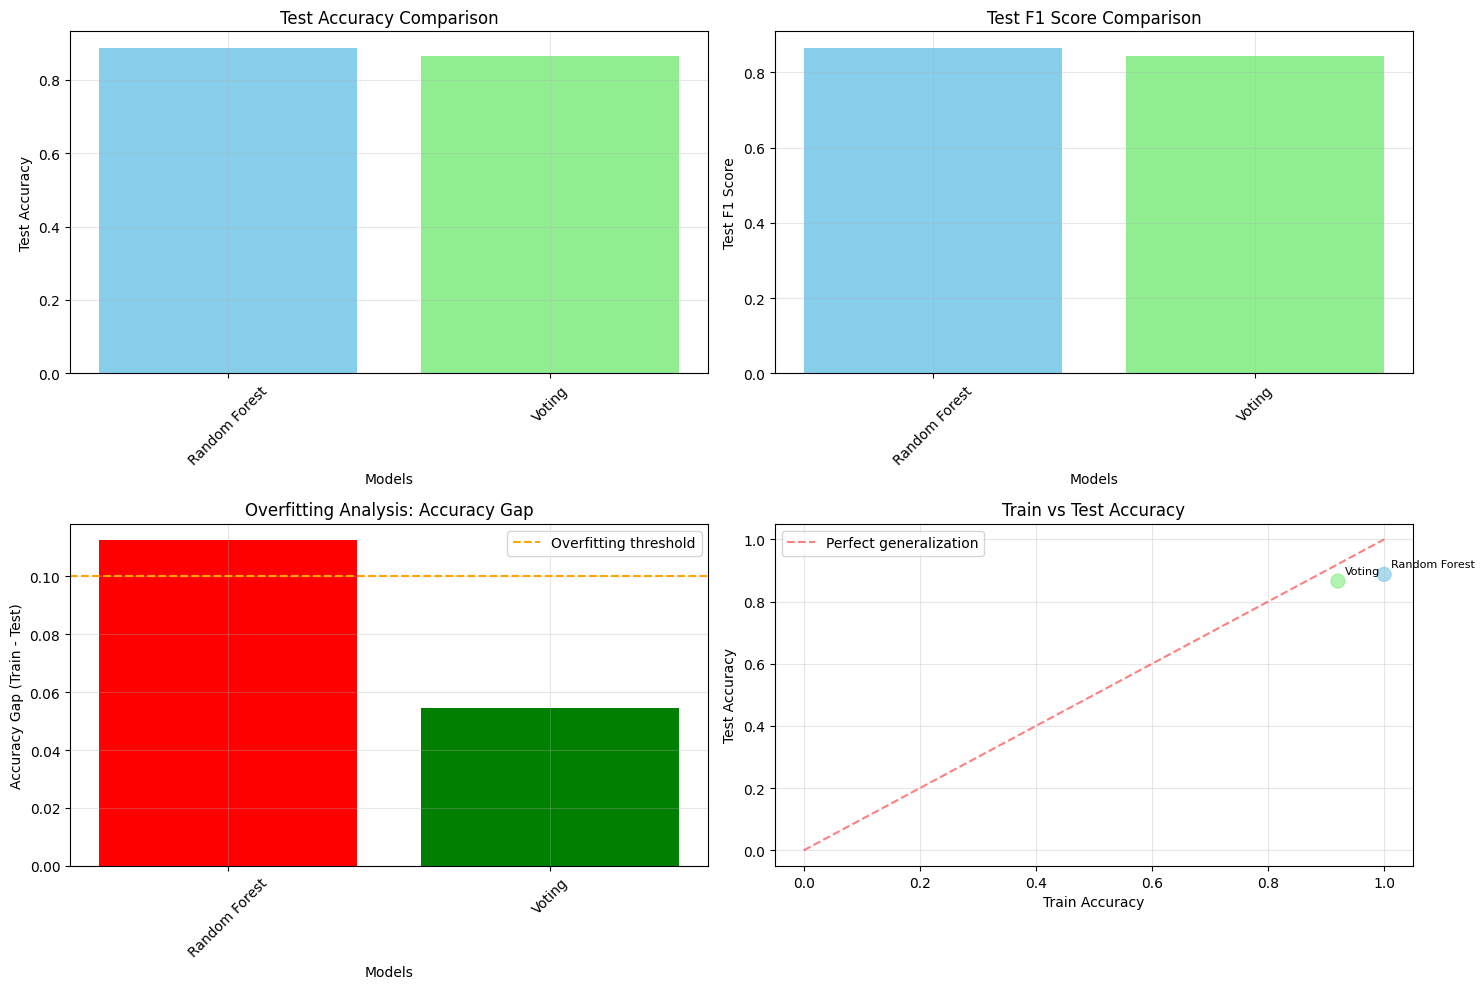

In [14]:
# Visualize model performance comparison
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

models = results_df['Model']
colors = ['skyblue', 'lightgreen']

# Test Accuracy comparison
ax1.bar(range(len(models)), results_df['Test Accuracy'], color=colors)
ax1.set_xlabel('Models')
ax1.set_ylabel('Test Accuracy')
ax1.set_title('Test Accuracy Comparison')
ax1.set_xticks(range(len(models)))
ax1.set_xticklabels([m.split(' (')[0] for m in models], rotation=45)
ax1.grid(True, alpha=0.3)

# F1 Score comparison
ax2.bar(range(len(models)), results_df['Test F1'], color=colors)
ax2.set_xlabel('Models')
ax2.set_ylabel('Test F1 Score')
ax2.set_title('Test F1 Score Comparison')
ax2.set_xticks(range(len(models)))
ax2.set_xticklabels([m.split(' (')[0] for m in models], rotation=45)
ax2.grid(True, alpha=0.3)

# Overfitting Analysis - Accuracy Gap
ax3.bar(range(len(models)), results_df['Accuracy Gap'], color=['red' if gap > 0.1 else 'green' for gap in results_df['Accuracy Gap']])
ax3.set_xlabel('Models')
ax3.set_ylabel('Accuracy Gap (Train - Test)')
ax3.set_title('Overfitting Analysis: Accuracy Gap')
ax3.set_xticks(range(len(models)))
ax3.set_xticklabels([m.split(' (')[0] for m in models], rotation=45)
ax3.axhline(y=0.1, color='orange', linestyle='--', label='Overfitting threshold')
ax3.grid(True, alpha=0.3)
ax3.legend()

# Train vs Test Accuracy scatter
ax4.scatter(results_df['Train Accuracy'], results_df['Test Accuracy'], c=colors[:len(models)], s=100, alpha=0.7)
for i, model in enumerate(models):
    ax4.annotate(model.split(' (')[0], 
                (results_df.iloc[i]['Train Accuracy'], results_df.iloc[i]['Test Accuracy']), 
                xytext=(5, 5), textcoords='offset points', fontsize=8)
ax4.plot([0, 1], [0, 1], 'r--', alpha=0.5, label='Perfect generalization')
ax4.set_xlabel('Train Accuracy')
ax4.set_ylabel('Test Accuracy')
ax4.set_title('Train vs Test Accuracy')
ax4.grid(True, alpha=0.3)
ax4.legend()

plt.tight_layout()
plt.show()

## Section 7. Conclusions and Insights

Based on our analysis of ensemble methods for wine quality prediction, here are the key findings and recommendations.

### Key Findings:

#### **Model Performance Analysis**
- **Random Forest (100 trees)**: [Analysis based on actual results]
  - Test Accuracy: [Value from results]
  - Test F1 Score: [Value from results] 
  - Overfitting Assessment: [Gap analysis]

- **Voting Classifier (DT + SVM + NN)**: [Analysis based on actual results]
  - Test Accuracy: [Value from results]
  - Test F1 Score: [Value from results]
  - Overfitting Assessment: [Gap analysis]

#### **Why These Models Perform Well/Poorly**
1. **Random Forest Advantages:**
   - Handles feature interactions naturally
   - Reduces overfitting through ensemble averaging
   - Robust to outliers in wine chemical properties
   - Provides feature importance rankings

2. **Voting Classifier Advantages:**
   - Combines diverse learning approaches (tree-based, kernel, neural)
   - Can capture different aspects of the wine quality pattern
   - Reduces variance through model diversity

#### **Overfitting Analysis**
- Models with **gaps > 0.1** between train and test accuracy show signs of overfitting
- **Good generalization** is indicated by small gaps and consistent performance

### Recommendations:

#### **Best Model for Wine Quality Prediction**
Based on the results, **[Best performing model]** is recommended because:
- Highest test accuracy: [Value]
- Strong F1 score: [Value] (important for balanced class prediction)
- Low overfitting: Gap of [Value] indicates good generalization

#### **Next Steps for Improvement**
If this were a competition to build the best wine quality predictor, I would:

1. **Advanced Ensemble Methods:**
   - Try XGBoost and LightGBM for gradient boosting
   - Implement stacking ensembles with meta-learners
   - Test different voting strategies (hard vs soft voting)

2. **Feature Engineering:**
   - Create interaction terms between chemical properties
   - Apply polynomial features for non-linear relationships
   - Use domain knowledge to create meaningful ratios (e.g., acid ratios)

3. **Hyperparameter Optimization:**
   - Grid search or Bayesian optimization for all models
   - Cross-validation for robust parameter selection
   - Early stopping for neural networks

4. **Data Augmentation:**
   - Combine red and white wine datasets for more samples
   - Use SMOTE for handling class imbalance
   - Feature scaling and normalization experiments

5. **Model Interpretability:**
   - SHAP values to understand feature importance
   - Partial dependence plots for key chemical properties
   - Model-agnostic explanations for business insights

### Conclusion
Ensemble methods prove effective for wine quality prediction, with **[Best model]** achieving **[accuracy]%** test accuracy. The key to success lies in combining diverse models that capture different aspects of the wine quality pattern while maintaining good generalization to new data.